# 01_01.Regression(예측)_모델 만들기
- scikit-learn 기초: https://scikit-learn.org/stable/getting_started.html
- 선형회귀분석: https://scikit-learn.org/stable/modules/linear_model.html

## 1.기본 package 설정

In [ ]:
## 1.기본
import numpy as np  # numpy 패키지 가져오기
import matplotlib.pyplot as plt # 시각화 패키지 가져오기
import seaborn as sns # 시각화

## 2.데이터 가져오기
import pandas as pd # csv -> dataframe으로 전환

## 3.데이터 전처리

# 4. 훈련/검증용 데이터 분리
from sklearn.model_selection import train_test_split

## 5.모델구축
from sklearn import linear_model

## 6.모델검정


# 7.최적화


## 2.데이터 불러오기

### 2.1 구글 드라이브와 연결

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 2.2 데이터 프레임으로 저장
- 원본데이터(csv)를 dataframe 형태로 가져오기(pandas)

In [ ]:
housing_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/주택가격.csv', encoding="cp949")
housing_df.head()

,id,가격,연면적,품질,상태,건축년도,리모델링년도,지하면적,차고면적,면적_1층,면적_2층,주거유형,판매유형,판매조건
0,1,208500,8450,7,5,2003,2003,856,548,856,854,1,1,1
1,2,181500,9600,6,8,1976,1976,1262,460,1262,0,1,1,1
2,3,223500,11250,7,5,2001,2002,920,608,920,866,1,1,1
3,4,140000,9550,7,5,1915,1970,756,642,961,756,1,1,2
4,5,250000,14260,8,5,2000,2000,1145,836,1145,1053,1,1,1


### 2.3 자료구조 살펴보기

In [ ]:
housing_df.shape

(1180, 14)

In [ ]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1180 entries, 0 to 1179
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   id      1180 non-null   int64
 1   가격      1180 non-null   int64
 2   연면적     1180 non-null   int64
 3   품질      1180 non-null   int64
 4   상태      1180 non-null   int64
 5   건축년도    1180 non-null   int64
 6   리모델링년도  1180 non-null   int64
 7   지하면적    1180 non-null   int64
 8   차고면적    1180 non-null   int64
 9   면적_1층   1180 non-null   int64
 10  면적_2층   1180 non-null   int64
 11  주거유형    1180 non-null   int64
 12  판매유형    1180 non-null   int64
 13  판매조건    1180 non-null   int64
dtypes: int64(14)
memory usage: 129.2 KB


In [ ]:
housing_df.columns

Index(['id', '가격', '연면적', '품질', '상태', '건축년도', '리모델링년도', '지하면적', '차고면적',
       '면적_1층', '면적_2층', '주거유형', '판매유형', '판매조건'],
      dtype='object')

## 3.데이터 전처리

### 3.1 필요없는 변수 제거

In [ ]:
housing_df = housing_df.drop (['id'], axis=1)
housing_df.head()

,가격,연면적,품질,상태,건축년도,리모델링년도,지하면적,차고면적,면적_1층,면적_2층,주거유형,판매유형,판매조건
0,208500,8450,7,5,2003,2003,856,548,856,854,1,1,1
1,181500,9600,6,8,1976,1976,1262,460,1262,0,1,1,1
2,223500,11250,7,5,2001,2002,920,608,920,866,1,1,1
3,140000,9550,7,5,1915,1970,756,642,961,756,1,1,2
4,250000,14260,8,5,2000,2000,1145,836,1145,1053,1,1,1


## 4.데이터 탐색

## 5.훈련/테스트용 데이터 분할


### 5.1 data와 target으로 분리
- data: X, target: y 로 분리

- X 추출


In [ ]:
# X 추출법(1): housing_df.columns에서 변수명을 복사해서 사용
housing_df.loc[:, ['가격', '연면적', '품질', '상태', '건축년도', '리모델링년도', '지하면적', '차고면적',
       '면적_1층', '면적_2층', '주거유형', '판매유형', '판매조건']].head()

,가격,연면적,품질,상태,건축년도,리모델링년도,지하면적,차고면적,면적_1층,면적_2층,주거유형,판매유형,판매조건
0,208500,8450,7,5,2003,2003,856,548,856,854,1,1,1
1,181500,9600,6,8,1976,1976,1262,460,1262,0,1,1,1
2,223500,11250,7,5,2001,2002,920,608,920,866,1,1,1
3,140000,9550,7,5,1915,1970,756,642,961,756,1,1,2
4,250000,14260,8,5,2000,2000,1145,836,1145,1053,1,1,1


In [ ]:
# X 추출법(2): 변수 갯수로 추출
housing_df.iloc[:, 0:13]

,가격,연면적,품질,상태,건축년도,리모델링년도,지하면적,차고면적,면적_1층,면적_2층,주거유형,판매유형,판매조건
0,208500,8450,7,5,2003,2003,856,548,856,854,1,1,1
1,181500,9600,6,8,1976,1976,1262,460,1262,0,1,1,1
2,223500,11250,7,5,2001,2002,920,608,920,866,1,1,1
3,140000,9550,7,5,1915,1970,756,642,961,756,1,1,2
4,250000,14260,8,5,2000,2000,1145,836,1145,1053,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1175,175000,7917,6,5,1999,2000,953,460,953,694,1,1,1
1176,210000,13175,6,6,1978,1988,1542,500,2073,0,1,1,1
1177,266500,9042,7,9,1941,2006,1152,252,1188,1152,1,1,1
1178,142125,9717,5,6,1950,1996,1078,240,1078,0,1,1,1


In [ ]:
# X 추출법(3): y값만 제거
X = housing_df.drop (['가격'], axis=1)
X.head()

,연면적,품질,상태,건축년도,리모델링년도,지하면적,차고면적,면적_1층,면적_2층,주거유형,판매유형,판매조건
0,8450,7,5,2003,2003,856,548,856,854,1,1,1
1,9600,6,8,1976,1976,1262,460,1262,0,1,1,1
2,11250,7,5,2001,2002,920,608,920,866,1,1,1
3,9550,7,5,1915,1970,756,642,961,756,1,1,2
4,14260,8,5,2000,2000,1145,836,1145,1053,1,1,1


- target(y) 추출
- y 값을 series에서 배열로 변환해서 사용해야 하지만 수치형 변수는 그대로 사용할 수 있음

In [ ]:
y = housing_df['가격']
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: 가격, dtype: int64

In [ ]:
# y 값을 series에서 배열로 변환
# y = np.array(y)
# y

array([208500, 181500, 223500, ..., 266500, 142125, 147500])

### 5.2 훈련용 및 테스트용 데이터 분할
- test_size: 검증데이터 30%
- random_state : random seed 번호 = 1
- stratify : y(클래스)의 비율에 따라 분할(분류모형일때 사용)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 1)

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 826 entries, 433 to 1061
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   연면적     826 non-null    int64
 1   품질      826 non-null    int64
 2   상태      826 non-null    int64
 3   건축년도    826 non-null    int64
 4   리모델링년도  826 non-null    int64
 5   지하면적    826 non-null    int64
 6   차고면적    826 non-null    int64
 7   면적_1층   826 non-null    int64
 8   면적_2층   826 non-null    int64
 9   주거유형    826 non-null    int64
 10  판매유형    826 non-null    int64
 11  판매조건    826 non-null    int64
dtypes: int64(12)
memory usage: 83.9 KB


In [ ]:
y_train.info()

<class 'pandas.core.series.Series'>
Int64Index: 826 entries, 433 to 1061
Series name: 가격
Non-Null Count  Dtype
--------------  -----
826 non-null    int64
dtypes: int64(1)
memory usage: 12.9 KB


In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354 entries, 660 to 678
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   연면적     354 non-null    int64
 1   품질      354 non-null    int64
 2   상태      354 non-null    int64
 3   건축년도    354 non-null    int64
 4   리모델링년도  354 non-null    int64
 5   지하면적    354 non-null    int64
 6   차고면적    354 non-null    int64
 7   면적_1층   354 non-null    int64
 8   면적_2층   354 non-null    int64
 9   주거유형    354 non-null    int64
 10  판매유형    354 non-null    int64
 11  판매조건    354 non-null    int64
dtypes: int64(12)
memory usage: 36.0 KB


In [ ]:
y_test.info()

<class 'pandas.core.series.Series'>
Int64Index: 354 entries, 660 to 678
Series name: 가격
Non-Null Count  Dtype
--------------  -----
354 non-null    int64
dtypes: int64(1)
memory usage: 5.5 KB


## 6.pipeline으로 데이터 전처리
https://scikit-learn.org/stable/auto_examples/compose/plot_column_transformer_mixed_types.html
- R에서 recipe
- 범주형 변수: OneHotEncoder
- 수치형 변수:
- 선형모델은 StandardScaler 로 표준화
- tree형 모델은 데이터 원형 사용

## 7.모델만들기 (모델 설정)
- R에서 workflow
- 예측모델: 000_reg
- 분류모델: 000_clf

In [ ]:
lr_reg = linear_model.LinearRegression()
lr_reg

LinearRegression()

## 8.모델 훈련(모델 학습)
- machine learning

### 8.1 모델 훈련하기(learning)

In [ ]:
lr_reg.fit(X_train, y_train)

LinearRegression()

### 8.2 중요변수확인

In [ ]:
lr_reg.coef_

array([ 1.21946491e+00,  1.22826196e+04,  6.10331216e+03,  4.58304941e+02,
        2.12974878e+02,  2.38280328e+01,  2.66557067e+01,  4.80105695e+01,
        4.22413480e+01, -3.09854861e+03, -5.50488672e+03, -8.45511770e+03])

## 9.모델 test 및 검정

### 9.1 검증용 데이터로 예측
- predict (class로 표시)
- predict_proba (확률값으로 표시): 분류모델에서 사용

In [ ]:
y_pred = lr_reg.predict(X_test)
y_pred

array([221460.31791255, 102668.68530043,  53499.05498475, 203983.00659773,
       176447.15325838, 207662.85085227, 144766.93411067, 116163.34647028,
       141447.48439608, 138868.06246715, 164888.98833584, 138868.06246715,
       127183.14425703, 168081.25612449, 140550.63586442, 148722.89366549,
       160736.1074222 , 119106.33374852, 144090.84794491, 180882.01392794,
       123558.37638331, 176998.73447844, 138868.06246715, 227474.35594377,
       230642.75966078, 237871.32928934, 168074.17760981, 112340.65829601,
       199492.29068055,  80104.26293837,  64642.21706676, 136308.26265989,
       137320.19360234, 208103.46261518, 249166.96903721, 215129.19183421,
       266106.22727826, 189656.26464236, 208028.02832398, 216385.89632975,
       147167.91237909, 168791.80095451, 210304.34502898, 129633.02364669,
       250422.05103956,  92070.81276414, 125857.30345206,  94777.58337073,
       208846.72448967, 160116.44469997, 207532.28434109, 124737.40856999,
       171240.90605616, 2

### 9.2 실제값과 예측값 확인

In [ ]:
output = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred.squeeze()})
output

,Actual,Predicted
660,237000,221460.317913
548,108480,102668.685300
1063,72500,53499.054985
321,241000,203983.006598
1055,179200,176447.153258
...,...,...
56,226000,215772.406361
594,265979,224075.843135
1131,193000,182569.922862
54,219500,224277.074747


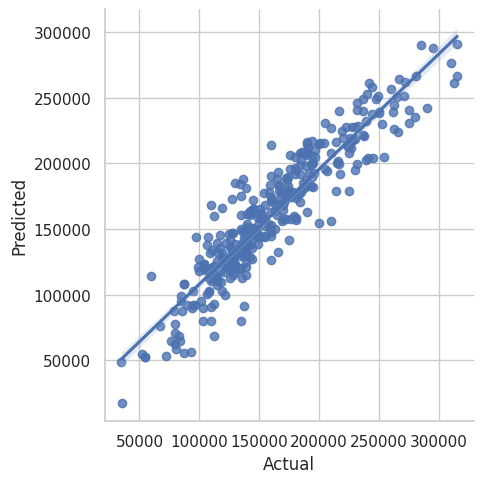

In [ ]:
sns.lmplot(x ='Actual', y ='Predicted', data = output)